<h1>Energy Consumption</h1>

<h2>Notes</h2>

In [1]:
#Population is the number you see in the row multiplies by 1000

#Energy intensity—calculated as total energy consumption divided by real 
#gross domestic product (GDP)—is a common energy indicator and 
#efficiency measure. Measured in BTU's

#Electric power consumption per capita (kWh ) is the production of power 
#plants and combined heat and power plants less transmission, 
#distribution, and transformation losses and own use by heat and 
#power plants, divided by midyear population. Measured in kWh

#Energy production refers to how much primary energy a country extracts 
#from nature. This is the total of all of the harvested primary fuels 
#and primary energy flows. Note production ignores both imports and exports,
#and sums up what's extracted from nature.

In [2]:
# Country - Mexico
# Energy_type - Type of energy source
# Year - Year the data was recorded
# Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)
# Energy_production - Amount of Production for the specific energy source, measured (quad Btu)
# GDP - Countries GDP at purchasing power parities, measured (Billion 2015$ PPP)
# Population - Population of specific Country, measured (Mperson)
# Energyintensityper_capita - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
# Energyintensityby_GDP- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015$ GDP PPP)
# CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)

<h2>Questions</h2>

- Keep these questions in mind when looking into the dataset 

In [3]:
#Questions:
#Does population affect how much CO2 Emission is released?
#Which is the largest energy type consumed?
#Is the trend moving up or down? Last 5 years of the Data?

<h2>Articles</h2>

- This is used to show if what you are doing is matching up by what is being reported in real life.

In [4]:
#Articles
#Mexicos Oil Production Declining since 2004
#https://www.eia.gov/international/analysis/country/MEX

#President Obrador sees future in non-renewables than renewables
#https://www.nytimes.com/es/2022/08/17/espanol/mexico-petroleo-amlo-pemex.html#:~:text=the%20main%20story-,M%C3%A9xico%20apuesta%20su%20futuro%20energ%C3%A9tico%20al%20petr%C3%B3leo%2C%20no%20a%20las,los%20objetivos%20clim%C3%A1ticos%20de%20M%C3%A9xico.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

In [6]:
from pandas.plotting import scatter_matrix, lag_plot
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
pd.options.mode.chained_assignment = None
dataset = pd.read_csv('energy.csv')

In [8]:
mexico_df = dataset[dataset.Country == 'Mexico']
coal = mexico_df[mexico_df.Energy_type == 'coal']

In [9]:
mexico_df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
798,798,Mexico,all_energy_types,1980,3.801224,5.713649,984.750,67967.05,55.927459,3.860091,NaN
799,799,Mexico,coal,1980,0.088556,0.065223,984.750,67967.05,55.927459,3.860091,NaN
800,800,Mexico,natural_gas,1980,0.843744,0.950400,984.750,67967.05,55.927459,3.860091,NaN
801,801,Mexico,petroleum_n_other_liquids,1980,2.680407,4.514688,984.750,67967.05,55.927459,3.860091,NaN
802,802,Mexico,nuclear,1980,NaN,NaN,984.750,67967.05,55.927459,3.860091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
54853,54853,Mexico,coal,2019,0.416173,0.207908,2384.142,127745.80,62.518639,3.349840,45.109508
54854,54854,Mexico,natural_gas,2019,3.019191,0.985764,2384.142,127745.80,62.518639,3.349840,154.494922
54855,54855,Mexico,petroleum_n_other_liquids,2019,3.794168,3.994546,2384.142,127745.80,62.518639,3.349840,256.543908
54856,54856,Mexico,nuclear,2019,0.109517,0.109517,2384.142,127745.80,62.518639,3.349840,0.000000


In [10]:
corr_matrix = mexico_df.corr(numeric_only = True)

In [11]:
#Looking at the correlation matrix for Energy_consumption we can see 
#that CO2_emission, Energy_production are the two that affect it the most
#but I would want to take a look at the GDP, Year and Population as well

<h1>Correlation Matrix</h1>

In [12]:
corr_matrix['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
CO2_emission                   0.991656
Energy_production              0.938915
GDP                            0.152733
Year                           0.152501
Unnamed: 0                     0.152438
Population                     0.152073
Energy_intensity_per_capita    0.127606
Energy_intensity_by_GDP       -0.110423
Name: Energy_consumption, dtype: float64

<h2>Corr Cols</h2>

array([[<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_consumption'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Population', ylabel='CO2_emission'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_production'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Population'>,
        <AxesSubplot:xlabel='CO2_emiss

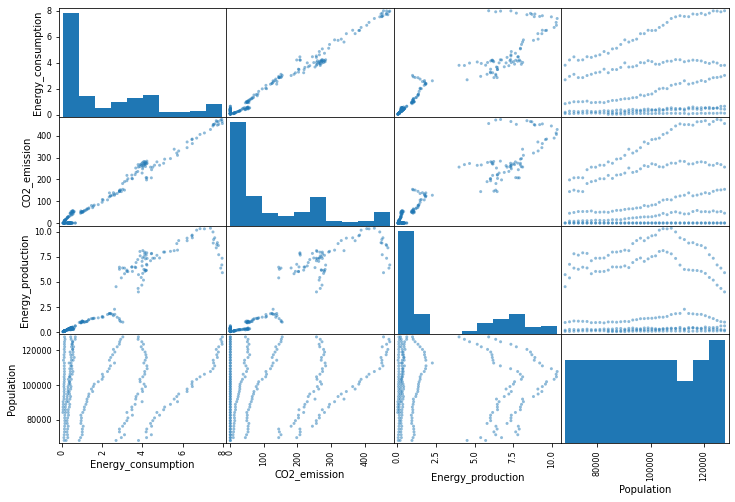

In [13]:
cols = ['Energy_consumption','CO2_emission', 'Energy_production', 'Population']
scatter_matrix(mexico_df[cols], figsize=(12, 8))

In [14]:
# When creating a scatter plot for the Energy Types, it shows that
# petroleum is the number 1 non-renewable resource that is used
# the most, Natural gas is second and it looks like it is on the rise
# for consumption

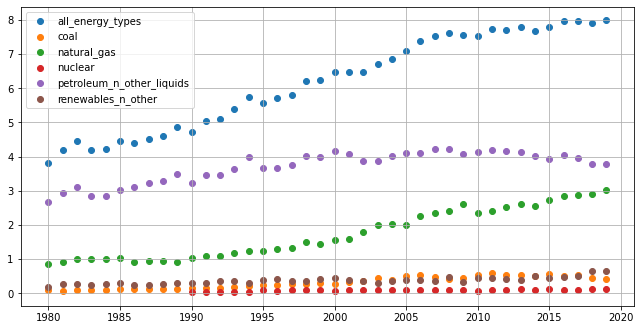

In [15]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))

for a,(b,c) in enumerate(mexico_df.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label = b)
    
axes.legend()
axes.grid(True)
plt.show()

<h1>Pie Charts</h1>

<h2>1980-2019 Consumption </h2>

In [16]:
total_energy_consumption = mexico_df.copy()

In [17]:
pie_chart_tec = total_energy_consumption.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()

In [18]:
pie_chart_tec.drop(pie_chart_tec[(pie_chart_tec['Energy_type'] == 'all_energy_types')].index, inplace = True)

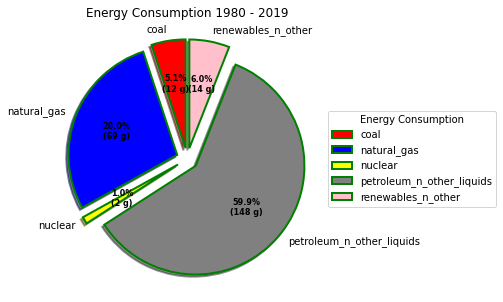

In [19]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(pie_chart_tec.Energy_consumption,
                                  autopct = lambda pct: func(pct, pie_chart_tec.Energy_consumption),
                                  labels = pie_chart_tec.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, pie_chart_tec.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 1980 - 2019")
 
# show plot
plt.show()

<h2>2015-2019 Consumption</h2>

In [20]:
# I was looking at the last 5 years of the dataset to see which is their largest Energy
# consumption. The last 5 years of the Dataset will later be used to determine if Mexico
# has had an increase or decrease in their Energy Consumption

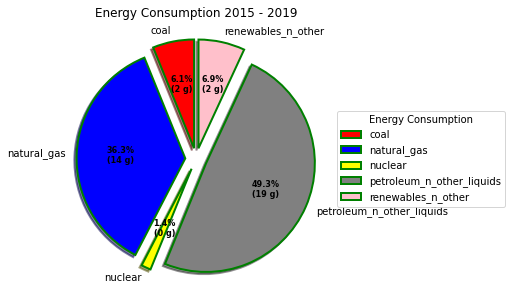

In [21]:
last5yrs = mexico_df.tail(30)

last5yrs= last5yrs.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()

last5yrs

last5yrs.drop(last5yrs[(last5yrs['Energy_type'] == 'all_energy_types')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(last5yrs.Energy_consumption,
                                  autopct = lambda pct: func(pct, last5yrs.Energy_consumption),
                                  labels = last5yrs.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, last5yrs.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Energy Consumption 2015 - 2019")
 
# show plot
plt.show()

<h1>All Energy Types</h1>

<h2>CO2_Emissions</h2>

In [22]:
# The all_energy_types in the dataset allows us to see the total CO2_emissions from all the 
# energy types (coal, oil, natural gas, nuclear, renweables_n_others) as well as the totals
# from all the other columns for a specific year

# Using all Energy Types we can see that from 1980 to 2019 Mexico does have an increase of
# CO2 emissions released into the Atmosphere 

In [72]:
mexico_df[mexico_df.Year == 2000][['Energy_type','Year','CO2_emission']]

#The all_energy_types 

,Energy_type,Year,CO2_emission
28518,all_energy_types,2000,364.302192
28519,coal,2000,28.132987
28520,natural_gas,2000,77.054157
28521,petroleum_n_other_liquids,2000,259.115048
28522,nuclear,2000,0.000000
28523,renewables_n_other,2000,0.000000


In [23]:
all_energy_df = mexico_df[mexico_df.Energy_type == 'all_energy_types']
all_energy_df.fillna(0, axis = 0, inplace = True)

In [24]:
all_energy_df[ 'Change' ] = all_energy_df.Energy_consumption.rolling(2).mean()
all_energy_df['Change_CO2'] = all_energy_df.CO2_emission.rolling(2).mean()

In [25]:
x_all = np.array(all_energy_df.Population).reshape((-1,1))
y_all = np.array(all_energy_df.CO2_emission)

In [27]:
lr_model_all = LinearRegression().fit(x_all,y_all)

In [28]:
y_pred_all = lr_model_all.predict(x_all)

In [29]:
X2_all = sm.add_constant(x_all)
est_all = sm.OLS(y_all, X2_all)
est2_all = est_all.fit()
print(est2_all.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     319.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.31e-20
Time:                        23:07:59   Log-Likelihood:                -198.21
No. Observations:                  40   AIC:                             400.4
Df Residuals:                      38   BIC:                             403.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -206.5723     31.638     -6.529      0.0

In [30]:
r_squared_all = lr_model_all.score(x_all,y_all)
print(f'Coeficient of Determination(R-Squared): {r_squared_all}',
      '\nY-Intercept:',lr_model_all.intercept_,
     '\nSlope:',lr_model_all.coef_)

Coeficient of Determination(R-Squared): 0.8937205177117008 
Y-Intercept: -206.5723101561373 
Slope: [0.00566408]


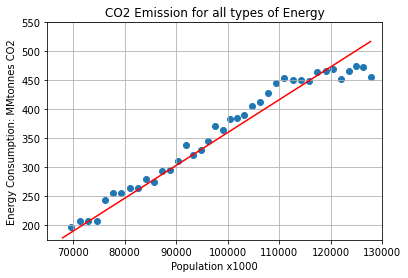

In [31]:
plt.scatter(all_energy_df.Population, all_energy_df.CO2_emission)
plt.grid(True)
plt.title('CO2 Emission for all types of Energy')
plt.xlabel('Population x1000')
plt.ylabel('Energy Consumption: MMtonnes CO2')
plt.xlim(65000, 130000)
plt.ylim(175, 550)

plt.plot(x_all, y_pred_all, color = 'red')

plt.show()

Moving average change by year:  [0.0, 98.84, 134.95, 153.26, 164.06, 177.45, 188.71, 197.12, 204.68, 210.71, 217.04, 221.78, 227.24, 232.12, 237.34, 243.66, 248.2, 252.77, 257.65, 263.34, 268.15, 273.35, 278.21, 282.84, 287.77, 292.59, 297.64, 302.9, 308.12, 312.89, 317.36, 321.46, 325.78, 329.89, 333.87, 337.16, 340.62, 344.15, 347.44, 350.15]
Rolling average change: 254.58


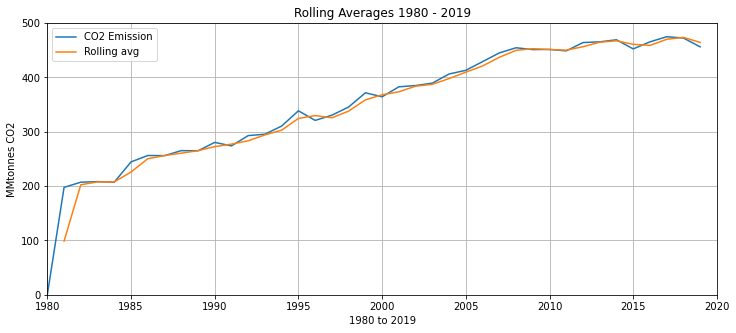

In [32]:
plt.figure( figsize = ( 12, 5))

sns.lineplot( x = 'Year',
             y = 'CO2_emission',
             data = all_energy_df,
             label = 'CO2 Emission')
  
sns.lineplot( x = 'Year',
             y = 'Change_CO2',
             data = all_energy_df,
             label = 'Rolling avg')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy_df.CO2_emission));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Moving average change by year: ',moving_averages)
print('Rolling average change:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Rolling Averages 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('MMtonnes CO2')
plt.xlim(1980, 2020)
plt.ylim(0, 500)
plt.grid(True)

plt.show()

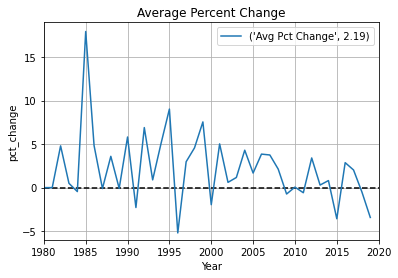

In [33]:
all_energy_df['pct_change'] = all_energy_df.CO2_emission.pct_change() * 100
all_energy_df.fillna(0,axis = 0, inplace = True)
all_energy_df.at[2184, 'pct_change'] = 0

sns.lineplot(x = 'Year',
             y = 'pct_change',
             data = all_energy_df,
             label = ('Avg Pct Change',round(all_energy_df["pct_change"].mean(), 2)))
plt.grid(True)
plt.title('Average Percent Change')
plt.xlim(1980, 2020)
plt.ylim(-6,19)
plt.hlines(0,xmin = 1980, xmax = 2020, colors = 'black', linestyles = 'dashed' )

plt.show()

<h3>2015 - 2019 CO2 Emissions</h3>

In [34]:
# Looking at the last 5 years of this Dataset we can see that Mexico has reduced its 
# Carbon Emissions, the slope of the entire dataset for CO2_Emissions is Slope: [0.00566408]
# While the slope for the last 5 years of this Dataset has fallen to Slope: [0.00107589]
# While this is still in an increase we can see there has been a reduction in CO2_Emissions

In [52]:
last5_all_energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Change,Change_CO2,pct_change
49308,49308,Mexico,all_energy_types,2015,7.804191,7.699777,2230.743,122042.5,63.946500,3.498471,452.339353,7.743312,460.739498,-3.581085
50694,50694,Mexico,all_energy_types,2016,7.973903,7.347492,2284.177,123510.2,64.560686,3.490931,465.320401,7.889047,458.829877,2.869759
52080,52080,Mexico,all_energy_types,2017,7.960065,6.679954,2337.576,124950.2,63.705899,3.405265,474.749421,7.966984,470.034911,2.026350
53466,53466,Mexico,all_energy_types,2018,7.905280,6.364569,2388.543,126362.2,62.560482,3.309666,472.354715,7.932672,473.552068,-0.504415
54852,54852,Mexico,all_energy_types,2019,7.986494,5.909857,2384.142,127745.8,62.518639,3.349840,456.148338,7.945887,464.251527,-3.430976


In [59]:
last5_all_energy = all_energy_df.tail()

In [60]:
x5_ec = np.array(last5_all_energy.Population).reshape((-1,1))
y5_ec = np.array(last5_all_energy.CO2_emission)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficient of Determination: {r_squared5_ec}',
      '\nY-Intercept:',lr_model5.intercept_,
     '\nSlope:',lr_model5.coef_)

Coeficient of Determination: 0.06120641702378338 
Y-Intercept: 329.7801014679122 
Slope: [0.00107589]


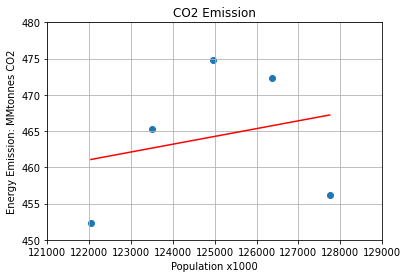

In [61]:
plt.scatter(last5_all_energy.Population, last5_all_energy.CO2_emission)
plt.grid(True)
plt.title('CO2 Emission')
plt.xlabel('Population x1000')
plt.ylabel('Energy Emission: MMtonnes CO2')
plt.xlim(121000, 129000)
plt.ylim(450, 480)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()

<h2>Energy Consumption</h2>

In [63]:
x_ec = np.array(all_energy_df.Population).reshape((-1,1))
y_ec = np.array(all_energy_df.Energy_consumption)

lr_model_ec = LinearRegression().fit(x_ec,y_ec)
y_pred_ec = lr_model_ec.predict(x_ec)

r_squared_ec = lr_model_ec.score(x_ec,y_ec)
print(f'Coeficient of Determination: {r_squared_ec}',
      '\nY-Intercept:',lr_model_ec.intercept_,
     '\nSlope:',lr_model_ec.coef_)

Coeficient of Determination: 0.9697379016613894 
Y-Intercept: -1.3722035331154228 
Slope: [7.69084988e-05]


In [64]:
X2_ec = sm.add_constant(x_ec)
est_ec = sm.OLS(y_ec, X2_ec)
est2_ec = est_ec.fit()
print(est2_ec.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1218.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.79e-30
Time:                        23:27:41   Log-Likelihood:                0.52207
No. Observations:                  40   AIC:                             2.956
Df Residuals:                      38   BIC:                             6.334
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3722      0.220     -6.235      0.0

In [65]:
r_squared_ec = lr_model_ec.score(x_ec,y_ec)
print(f'Coeficient of Determination(R-Sqaured): {r_squared_ec}',
      '\nY-Intercept:',lr_model_ec.intercept_,
     '\nSlope:',lr_model_ec.coef_)

Coeficient of Determination(R-Sqaured): 0.9697379016613894 
Y-Intercept: -1.3722035331154228 
Slope: [7.69084988e-05]


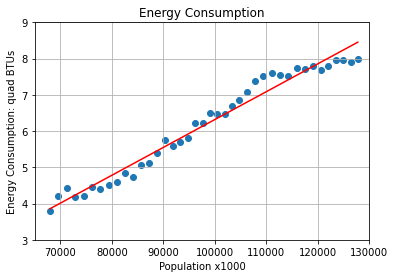

In [66]:
plt.scatter(all_energy_df.Population, all_energy_df.Energy_consumption)
plt.grid(True)
plt.title('Energy Consumption')
plt.xlabel('Population x1000')
plt.ylabel('Energy Consumption: quad BTUs')
plt.xlim(65000, 130000)
plt.ylim(3, 9)

plt.plot(x_ec, y_pred_ec, color = 'red')

plt.show()

Moving average change by year:  [3.8, 4.0, 4.15, 4.16, 4.17, 4.22, 4.24, 4.28, 4.31, 4.37, 4.4, 4.45, 4.5, 4.57, 4.65, 4.7, 4.76, 4.82, 4.9, 4.96, 5.03, 5.1, 5.16, 5.22, 5.29, 5.36, 5.43, 5.51, 5.58, 5.65, 5.71, 5.77, 5.83, 5.89, 5.94, 5.99, 6.04, 6.09, 6.14, 6.19]
Rolling average change: 5.03


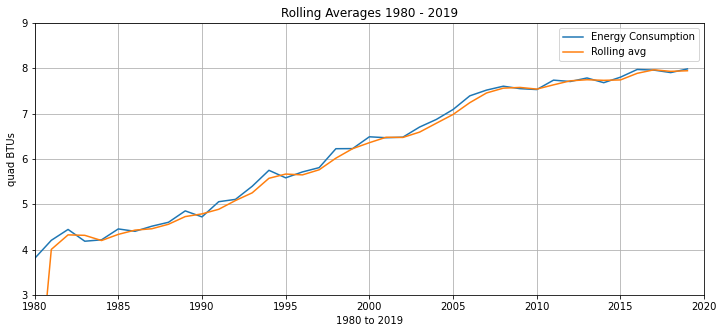

In [67]:
plt.figure( figsize = ( 12, 5))

sns.lineplot( x = 'Year',
             y = 'Energy_consumption',
             data = all_energy_df,
             label = 'Energy Consumption')
  
sns.lineplot( x = 'Year',
             y = 'Change',
             data = all_energy_df,
             label = 'Rolling avg')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy_df.Energy_consumption));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Moving average change by year: ',moving_averages)
print('Rolling average change:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Rolling Averages 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('quad BTUs')
plt.xlim(1980, 2020)
plt.ylim(3, 9)
plt.grid(True)

plt.show()

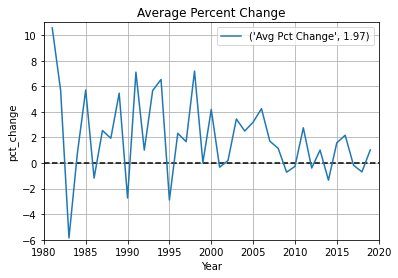

In [68]:
all_energy_df['pct_change'] = all_energy_df.Energy_consumption.pct_change() * 100
sns.lineplot(x = 'Year',
             y = 'pct_change',
             data = all_energy_df,
             label = ('Avg Pct Change',round(all_energy_df["pct_change"].mean(), 2)))
plt.grid(True)
plt.title('Average Percent Change')
plt.xlim(1980, 2020)
plt.ylim(-6,11)
plt.hlines(0,xmin = 1980, xmax = 2020, colors = 'black', linestyles = 'dashed' )

plt.show()

<h3>2015-2019</h3>

In [48]:
# Looking at the last 5 years of the Dataset we can see Mexico has had an increase in energy
# consumption

In [69]:
x5_ec = np.array(last5_all_energy.Population).reshape((-1,1))
y5_ec = np.array(last5_all_energy.Energy_consumption)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficient of Determination: {r_squared5_ec}',
      '\nY-Intercept:',lr_model5.intercept_,
     '\nSlope:',lr_model5.coef_)

Coeficient of Determination: 0.3970120955563744 
Y-Intercept: 5.314553750802255 
Slope: [2.09044763e-05]


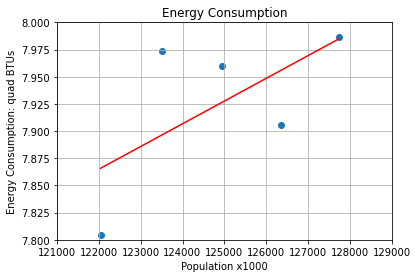

In [70]:
plt.scatter(last5_all_energy.Population, last5_all_energy.Energy_consumption)
plt.grid(True)
plt.title('Energy Consumption')
plt.xlabel('Population x1000')
plt.ylabel('Energy Consumption: quad BTUs')
plt.xlim(121000, 129000)
plt.ylim(7.8, 8)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()